# Import and Data Cleaning

In [290]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from import_data import import_merge


In [291]:
df = import_merge() # import 

# remove irrelevant columns
col_to_delete = ['Global Code', 'Global Name', 'Region Code', 
                 'Sub-region Code', 'Sub-region Name', 'Intermediate Region Code',
                 'Intermediate Region Name', 'M49 Code',
                 'ISO-alpha2 Code', 'ISO-alpha3 Code', 'Least Developed Countries (LDC)',
                 'Land Locked Developing Countries (LLDC)',
                 'Small Island Developing States (SIDS)',
                 'Developed / Developing Countries', 'Session','Speech']

df.drop(col_to_delete, axis=1, inplace=True)            # remove irrelevant columns
df.dropna(subset=['hdi_score'], axis=0, inplace=True)   # remove rows without hdi_score
df.dropna(subset=['Life Ladder'], axis=0, inplace=True) # remove rows without happiness scores

# Boxplots: HDI Class vs Happiness Metrics

In [314]:
def create_boxplot(column, show=True, save=False):
    
    # axis, title, and figure dictionaries
    axis_dict = {'Life Ladder':'Life Ladder Score',
                 'Log GDP per capita': 'GDP per Capita (log)',
                 'Social support':'Social Support Score',
                 'Healthy life expectancy at birth':'Life Expectancy (yr)',
                 'Freedom to make life choices':'Freedom Score',
                 'Generosity':'Generosity Score',
                 'Perceptions of corruption': 'Corruption Score',
                 'Positive affect':'Positive Affect Score',
                 'Negative affect':'Negative Affect Score'}

    title_dict = {'Life Ladder':'Life Ladder Score',
                  'Log GDP per capita': 'GDP per Capita',
                  'Social support':'Social Support Score',
                  'Healthy life expectancy at birth':'Life Expectancy',
                  'Freedom to make life choices':'Freedom Score',
                  'Generosity':'Generosity Score',
                  'Perceptions of corruption': 'Corruption Score',
                  'Positive affect':'Positive Affect Score',
                  'Negative affect':'Negative Affect Score'}
    
    figure_dict = {'Life Ladder':'lifeladder',
               'Log GDP per capita': 'gdp',
               'Social support':'socialsupport',
               'Healthy life expectancy at birth':'lifeexpectancy',
               'Freedom to make life choices':'freedom',
               'Generosity':'generosity',
               'Perceptions of corruption': 'corruption',
               'Positive affect':'pos_affect',
               'Negative affect':'neg_affect'}
    
    # plot and format axes
    bp = df.boxplot(column=column,
                    by='hdi_class',
                    grid=False,
                    positions=[4,3,1,2])
    plt.title('') # remove df.boxplot autogenerated title
    plt.suptitle('') # remove df.boxplot autogenerated title
    bp.set_xlabel('HDI Class')
    bp.set_ylabel(axis_dict.get(column))
    bp.set_title(f'{title_dict.get(column)} per HDI Class')
    fig = bp.get_figure()
    
    # close figure if not desired
    if show==False:
        plt.close()
    
    # save figure if desired
    if save==True:
        if 'boxplots' not in os.listdir():
            os.mkdir('boxplots')
    
        fig.savefig(f'boxplots/boxplot_{figure_dict.get(column)}.jpeg')
    

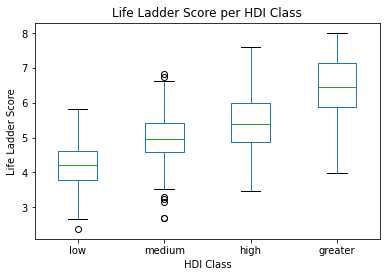

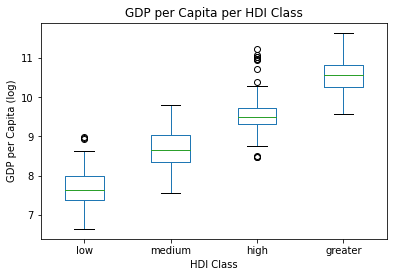

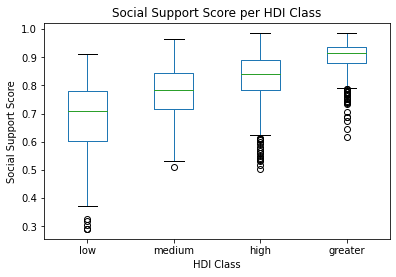

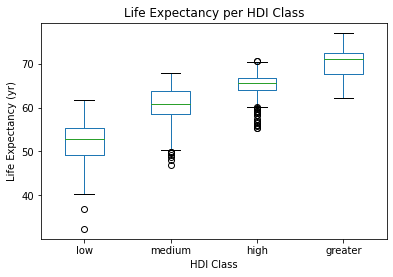

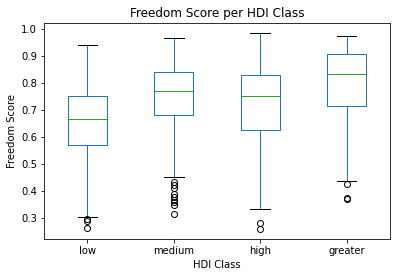

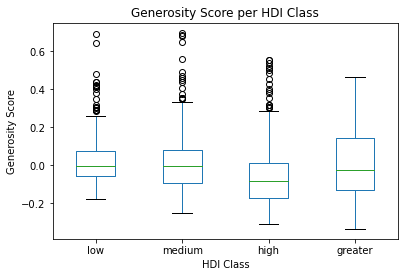

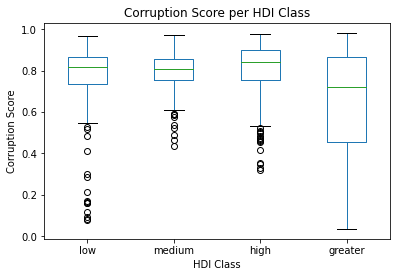

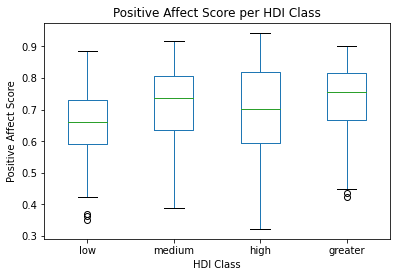

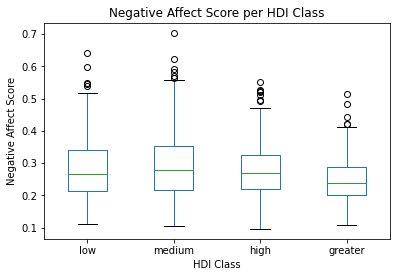

In [316]:
happy_feats = df.columns[3:-2]

for column in happy_feats:
    create_boxplot(column, show=True, save=True)
